<a href="https://colab.research.google.com/github/pankaj09318/Concept-and-technologies-of-AI-Assessment/blob/main/2501550_PankajGhimire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 1

Basic Data Exploration & Trend Visualization

3.1 Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)
Objective:

Explore the HDI dataset for the latest available year (2022) to practice basic EDA techniques.

Tasks:

Complete all the Following Tasks:
1. Extract Latest Year:

• Identify unique years in the dataset.

• Filter the dataset to include only observations from the year 2022.

• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).


In [5]:
# Problem-1
# Problem- 1A- Single Year HDI Exploration (Latest Year: 2022)

# Task-1

import pandas as pd
import numpy as np

# Load Dataset
hdi_df = pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv", encoding="latin1")

# Identify Unique year
unique_years = hdi_df['year'].unique()
print("Unique years in dataset: ",unique_years)

# Filter data for year 2022
hdi_2022_df = hdi_df[hdi_df['year'] == 2022].copy()





Unique years in dataset:  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


2. Data Exploration:

• Display the first 10 rows of the 2022 dataset.

• Count the number of rows and columns.

• List all column names and their data types.

In [6]:
# Task-2

# Display first 10 row of 2022 Dataset
print("Displaying the first 10 rows of the 2022 dataset:")
print(hdi_2022_df.head(10))

# Count the number of rows ans columns
rows, columns = hdi_2022_df.shape
print("\nNumber of rows: ", rows)
print("Number of columns: ", columns)

# List all column names and data types
print("\nListing all column names and their data types: ")
print(hdi_2022_df.dtypes)

Displaying the first 10 rows of the 2022 dataset:
     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145       

3. Missing Values & Data Cleaning:

• Check for missing values in each column and report total counts.

• Inspect dataset for:

– numeric columns stored as text,

– inconsistent or misspelled country names,

– duplicate rows,

– special characters (e.g., “–”) representing missing data.

• Apply necessary cleaning steps:

– convert data types where needed,

– remove duplicates,

– handle missing values (drop or impute; justify your choice).

In [7]:
# Task-3

# Countmissing values per column and report total count
missing_values = hdi_2022_df.isnull().sum()
print("\nMissing Values per Column: ")
print(missing_values[missing_values>0])

# Identify numeric column stored as text (object-type)
print(hdi_2022_df.select_dtypes(include="object").columns)
hdi_2022_df.describe(include="object")


# replacing special characters with NaN to handle data properly
hdi_2022_df.replace(["–", "...", "NA", "N/A", ""],
    np.nan,
    inplace=True
)

# Convert numeric columns stored as text
for col in hdi_2022_df.columns:
    if hdi_2022_df[col].dtype == "object":
        try:
            hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col])
        except ValueError:
            pass

# Standardize country names
hdi_2022_df["country"] = (hdi_2022_df["country"].str.strip().str.title())

# Check for duplicate rows
duplicate_count = hdi_2022_df.duplicated().sum()
print("\nDuplicate rows found:", duplicate_count)

# Remove duplicate rows
hdi_2022_df.drop_duplicates(inplace=True)

# Drop rows with missing values
hdi_2022_df_countries_only = hdi_2022_df[hdi_2022_df['iso3'].str.len() == 3].copy()
hdi_2022_df_clean = hdi_2022_df_countries_only.dropna().copy()


# Confirm no missing values remain
print("\nMissing values after cleaning:\n", hdi_2022_df_clean.isnull().sum())


Missing Values per Column: 
hdi                           2
hdi_f                        13
hdi_m                        13
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64
Index(['iso3', 'country'], dtype='object')

Duplicate rows found: 0

Missing values after cleaning:
 Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          

4. Basic Statistics:

• Compute the mean, median, and standard deviation of HDI for the year 2022.

• Identify the country with the highest HDI in 2022.

• Identify the country with the lowest HDI in 2022.

In [8]:
# Calculate basic descriptive statistics for HDI (2022)

# Compute the mean HDI value for the year 2022
hdi_mean = hdi_2022_df_clean['hdi'].mean()

# Compute the median HDI value for the year 2022
hdi_median = hdi_2022_df_clean['hdi'].median()

# Compute the standard deviation of HDI for the year 2022
hdi_std = hdi_2022_df_clean['hdi'].std()

# Display the computed statistics
print("Mean HDI (2022):", hdi_mean)
print("Median HDI (2022):", hdi_median)
print("Standard Deviation of HDI (2022):", hdi_std)

# Identify the country with the highest HDI in 2022
# Locate the row containing the maximum HDI value
highest_hdi_row = hdi_2022_df_clean.loc[hdi_2022_df_clean['hdi'].idxmax()]

# Extract the country name and HDI value
highest_hdi_country = highest_hdi_row['country']
highest_hdi_value = highest_hdi_row['hdi']

# Display the result
print("\nCountry with the highest HDI in 2022:")
print("Country:", highest_hdi_country)
print("HDI:", highest_hdi_value)

# Identify the country with the lowest HDI in 2022
# Locate the row containing the minimum HDI value
lowest_hdi_row = hdi_2022_df_clean.loc[hdi_2022_df_clean['hdi'].idxmin()]

# Extract the country name and HDI value
lowest_hdi_country = lowest_hdi_row['country']
lowest_hdi_value = lowest_hdi_row['hdi']

# Display the result
print("\nCountry with the lowest HDI in 2022:")
print("Country:", lowest_hdi_country)
print("HDI:", lowest_hdi_value)


Mean HDI (2022): 0.7331768707482993
Median HDI (2022): 0.76
Standard Deviation of HDI (2022): 0.1601509861520783

Country with the highest HDI in 2022:
Country: Switzerland
HDI: 0.967

Country with the lowest HDI in 2022:
Country: Somalia
HDI: 0.38


5. Filtering and Sorting:

• Filter countries with HDI {"hdi"} greater than 0.800.

• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross_inc_percap"} in
descending order.

• Display the top 10 countries.

In [9]:
# Filter countries with HDI greater than 0.800

high_hdi_df = hdi_2022_df_clean[hdi_2022_df_clean['hdi'] > 0.800].copy()

# Sort the filtered countries by Gross National Income
# (GNI) per Capita in descending order
sorted_df = high_hdi_df.sort_values(by='gross_inc_percap', ascending=False)

# Display the top 10 countries after sorting
print("Top 10 countries with HDI > 0.800 sorted by GNI per Capita:\n")
print(sorted_df.head(10))

Top 10 countries with HDI > 0.800 sorted by GNI per Capita:

      Unnamed: 0 iso3               country  year    hdi  life_expectancy  \
4718        4719  QAT                 Qatar  2022  0.875           81.559   
5213        5214  SGP             Singapore  2022  0.949           84.133   
2705        2706  IRL               Ireland  2022  0.950           82.716   
3398        3399  LUX            Luxembourg  2022  0.927           82.591   
6104        6105  ARE  United Arab Emirates  2022  0.937           79.196   
5609        5610  CHE           Switzerland  2022  0.967           84.255   
4322        4323  NOR                Norway  2022  0.966           83.393   
6170        6171  USA         United States  2022  0.927           78.203   
1550        1551  DNK               Denmark  2022  0.952           81.882   
824          825  BRN     Brunei Darussalam  2022  0.823           74.551   

      pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
4718      

6. Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):

HDI Category HDI Range (hdi)
Low < 0.550
Medium 0.550 – 0.699
High 0.700 – 0.799
Very ≥ 0.800

After creating this new column:

• verify that all countries are classified correctly,

• ensure the updated dataframe includes the new category column.

• Save the final dataframe as HDI category added.csv and include this file in your final
submission.

In [10]:
# Define a function to categorize countries based on HDI
# according to UNDP thresholds for the year 2022

def categorize_hdi(hdi):
    if hdi >= 0.800:
        return "Very High"
    elif hdi >= 0.700:
        return "High"
    elif hdi >= 0.550:
        return "Medium"
    else:
        return "Low"

# Create a new column 'HDI_Category' using the HDI values
hdi_2022_df_clean['HDI_Category'] = hdi_2022_df_clean['hdi'].apply(categorize_hdi)

# Create a copy of the final dataframe with HDI category
HDI_category_added = hdi_2022_df_clean.copy()

# Verify classification by displaying sample rows
print("Sample of countries with assigned HDI categories:\n")
print(HDI_category_added[['country', 'hdi', 'HDI_Category']].head())

# Verify that all four HDI categories are present
print("\nHDI Category distribution:\n")
print(HDI_category_added['HDI_Category'].value_counts())

# saving the final dataframe
HDI_category_added.to_csv('/content/drive/MyDrive/HDI_category_added.csv', index=False)

Sample of countries with assigned HDI categories:

         country    hdi HDI_Category
32   Afghanistan  0.462          Low
65       Albania  0.789         High
98       Algeria  0.745         High
164       Angola  0.591       Medium
230    Argentina  0.849    Very High

HDI Category distribution:

HDI_Category
Very High    58
High         35
Medium       28
Low          26
Name: count, dtype: int64


3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

Objective:

Analyze multi-year HDI patterns (2020, 2021, and 2022) to explore temporal changes, regional differences,
and trends across countries.

Tasks:

Complete all the Following Tasks:

1. Data Extraction and Saving:

• Filter the dataset to include only the years 2020, 2021, and 2022.

• Save the filtered dataset as HDI problem1B.csv.

• Use this cleaned dataset for all subsequent tasks in Problem 1B.

In [11]:
import pandas as pd

# Filter the HDI dataset to include only the years 2020, 2021, and 2022 for trend analysis
hdi_2020_2022_df = hdi_df[hdi_df["year"].isin([2020, 2021, 2022])].copy()

# Verify that only the required years are included
unique_years = hdi_2020_2022_df['year'].unique()
print("Years included in Problem 1B dataset:", unique_years)

# Save filtered dataset for Problem 1B
hdi_2020_2022_df.to_csv("/content/drive/MyDrive/HDI_problem1B.csv", index=False)


Years included in Problem 1B dataset: [2020 2021 2022]


2. Data Cleaning:

• Check for missing values in the following essential columns:

– hdi

– country

– year

• Identify and address the following issues:

– missing or null values,

– inconsistent or misspelled country names,

– duplicate rows,

– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).

• Apply and justify cleaning steps, including:

– handling missing values (dropping or imputing),

– converting data types appropriately,

– removing duplicate entries,

– ensuring consistent naming conventions for countries and years.

• All cleaning decisions must be clearly justified in the final report.

In [12]:
import numpy as np

# Define essential columns required for trend analysis
essential_cols = ["hdi", "country", "year"]

# Check missing values in essential columns
missing_essential = hdi_2020_2022_df[essential_cols].isnull().sum()

print("Missing values in essential columns:")
print(missing_essential)

# Replace non-numeric missing symbols with NaN
hdi_2020_2022_df.replace(
    ["–", "...", "NA", "N/A", ""],
    np.nan,
    inplace=True
)

# Convert numeric columns stored as text into proper numeric types
for col in hdi_2020_2022_df.columns:
    if hdi_2020_2022_df[col].dtype == "object":
        try:
            hdi_2020_2022_df[col] = pd.to_numeric(hdi_2020_2022_df[col])
        except ValueError:
            pass

# Standardize country names by removing extra spaces and fixing case
hdi_2020_2022_df["country"] = (
    hdi_2020_2022_df["country"]
    .str.strip()
    .str.title()
)


# Check duplicate rows
duplicate_count = hdi_2020_2022_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# Remove duplicates
hdi_2020_2022_df.drop_duplicates(inplace=True)

# Drop rows with missing values in essential columns
hdi_2020_2022_df_clean = hdi_2020_2022_df.dropna(
    subset=["hdi", "country", "year"]
)

# Confirm no missing values in essential columns
print(hdi_2020_2022_df_clean[essential_cols].isnull().sum())

# Final dataset shape
hdi_2020_2022_df_clean.shape

Missing values in essential columns:
hdi        8
country    0
year       0
dtype: int64
Number of duplicate rows: 0
hdi        0
country    0
year       0
dtype: int64


(610, 30)

3. Visualization Tasks:

• A. Line Chart — HDI Trend (Country-Level):

– Select any five countries (or five countries from a region of your choice).

– Plot HDI values for each country across the years 2020, 2021, and 2022.

– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.

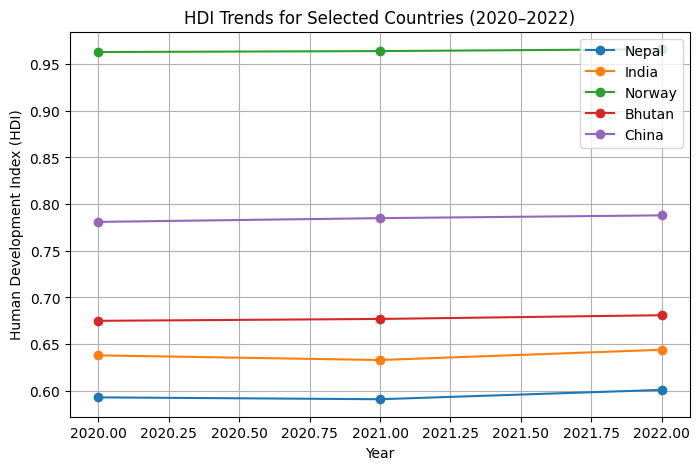

In [13]:
selected_countries = [
    "Nepal",
    "India",
    "Norway",
    "Bhutan",
    "China"
]

country_trend_df = hdi_2020_2022_df_clean[
    hdi_2020_2022_df_clean["country"].isin(selected_countries)
]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for country in selected_countries:
    country_data = country_trend_df[country_trend_df["country"] == country]
    plt.plot(
        country_data["year"],
        country_data["hdi"],
        marker="o",
        label=country.title()
    )

# Axis labels
plt.xlabel("Year")
plt.ylabel("Human Development Index (HDI)")

# Title
plt.title("HDI Trends for Selected Countries (2020–2022)")

# Legend
plt.legend()

# Grid for readability
plt.grid(True)

plt.show()


B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)
∗ Group the dataset by Region and Year.
∗ Compute the mean HDI for each region-year pair.
∗ Plot a bar chart comparing average HDI across regions for each year.
∗ Label axes clearly and include a descriptive title.

In [14]:
region_map = {

    # East Asia & Pacific
    "Australia": "East Asia & Pacific",
    "Brunei Darussalam": "East Asia & Pacific",
    "Cambodia": "East Asia & Pacific",
    "China": "East Asia & Pacific",
    "Fiji": "East Asia & Pacific",
    "Indonesia": "East Asia & Pacific",
    "Japan": "East Asia & Pacific",
    "Kiribati": "East Asia & Pacific",
    "Korea (Republic Of)": "East Asia & Pacific",
    "Lao People'S Democratic Republic": "East Asia & Pacific",
    "Malaysia": "East Asia & Pacific",
    "Marshall Islands": "East Asia & Pacific",
    "Micronesia, Fed. Sts.": "East Asia & Pacific",
    "Mongolia": "East Asia & Pacific",
    "Myanmar": "East Asia & Pacific",
    "Nauru": "East Asia & Pacific",
    "New Zealand": "East Asia & Pacific",
    "Palau": "East Asia & Pacific",
    "Papua New Guinea": "East Asia & Pacific",
    "Philippines": "East Asia & Pacific",
    "Samoa": "East Asia & Pacific",
    "Singapore": "East Asia & Pacific",
    "Solomon Islands": "East Asia & Pacific",
    "Thailand": "East Asia & Pacific",
    "Timor-Leste": "East Asia & Pacific",
    "Tonga": "East Asia & Pacific",
    "Tuvalu": "East Asia & Pacific",
    "Vanuatu": "East Asia & Pacific",
    "Viet Nam": "East Asia & Pacific",

    # Europe & Central Asia
    "Albania": "Europe & Central Asia",
    "Armenia": "Europe & Central Asia",
    "Austria": "Europe & Central Asia",
    "Azerbaijan": "Europe & Central Asia",
    "Belarus": "Europe & Central Asia",
    "Belgium": "Europe & Central Asia",
    "Bosnia And Herzegovina": "Europe & Central Asia",
    "Bulgaria": "Europe & Central Asia",
    "Croatia": "Europe & Central Asia",
    "Cyprus": "Europe & Central Asia",
    "Czechia": "Europe & Central Asia",
    "Denmark": "Europe & Central Asia",
    "Estonia": "Europe & Central Asia",
    "Finland": "Europe & Central Asia",
    "France": "Europe & Central Asia",
    "Georgia": "Europe & Central Asia",
    "Germany": "Europe & Central Asia",
    "Greece": "Europe & Central Asia",
    "Hungary": "Europe & Central Asia",
    "Iceland": "Europe & Central Asia",
    "Ireland": "Europe & Central Asia",
    "Italy": "Europe & Central Asia",
    "Kazakhstan": "Europe & Central Asia",
    "Kyrgyzstan": "Europe & Central Asia",
    "Latvia": "Europe & Central Asia",
    "Lithuania": "Europe & Central Asia",
    "Luxembourg": "Europe & Central Asia",
    "Malta": "Europe & Central Asia",
    "Moldova (Republic Of)": "Europe & Central Asia",
    "Netherlands": "Europe & Central Asia",
    "North Macedonia": "Europe & Central Asia",
    "Norway": "Europe & Central Asia",
    "Poland": "Europe & Central Asia",
    "Portugal": "Europe & Central Asia",
    "Romania": "Europe & Central Asia",
    "Russian Federation": "Europe & Central Asia",
    "Serbia": "Europe & Central Asia",
    "Slovak Republic": "Europe & Central Asia",
    "Slovenia": "Europe & Central Asia",
    "Spain": "Europe & Central Asia",
    "Sweden": "Europe & Central Asia",
    "Switzerland": "Europe & Central Asia",
    "Türkiye": "Europe & Central Asia",
    "Tajikistan": "Europe & Central Asia",
    "Ukraine": "Europe & Central Asia",
    "United Kingdom": "Europe & Central Asia",
    "Uzbekistan": "Europe & Central Asia",

    # Latin America & Caribbean
    "Argentina": "Latin America & Caribbean",
    "Bahamas": "Latin America & Caribbean",
    "Barbados": "Latin America & Caribbean",
    "Belize": "Latin America & Caribbean",
    "Bolivia (Plurinational State Of)": "Latin America & Caribbean",
    "Brazil": "Latin America & Caribbean",
    "Chile": "Latin America & Caribbean",
    "Colombia": "Latin America & Caribbean",
    "Costa Rica": "Latin America & Caribbean",
    "Cuba": "Latin America & Caribbean",
    "Dominican Republic": "Latin America & Caribbean",
    "Ecuador": "Latin America & Caribbean",
    "El Salvador": "Latin America & Caribbean",
    "Guatemala": "Latin America & Caribbean",
    "Guyana": "Latin America & Caribbean",
    "Haiti": "Latin America & Caribbean",
    "Honduras": "Latin America & Caribbean",
    "Jamaica": "Latin America & Caribbean",
    "Mexico": "Latin America & Caribbean",
    "Nicaragua": "Latin America & Caribbean",
    "Panama": "Latin America & Caribbean",
    "Paraguay": "Latin America & Caribbean",
    "Peru": "Latin America & Caribbean",
    "Suriname": "Latin America & Caribbean",
    "Trinidad and Tobago": "Latin America & Caribbean",
    "Uruguay": "Latin America & Caribbean",
    "Venezuela (Bolivarian Republic Of)": "Latin America & Caribbean",

    # Middle East & North Africa
    "Algeria": "Middle East & North Africa",
    "Bahrain": "Middle East & North Africa",
    "Egypt": "Middle East & North Africa",
    "Iran (Islamic Republic Of)": "Middle East & North Africa",
    "Iraq": "Middle East & North Africa",
    "Israel": "Middle East & North Africa",
    "Jordan": "Middle East & North Africa",
    "Kuwait": "Middle East & North Africa",
    "Lebanon": "Middle East & North Africa",
    "Libya": "Middle East & North Africa",
    "Morocco": "Middle East & North Africa",
    "Oman": "Middle East & North Africa",
    "Qatar": "Middle East & North Africa",
    "Saudi Arabia": "Middle East & North Africa",
    "Tunisia": "Middle East & North Africa",
    "United Arab Emirates": "Middle East & North Africa",
    "Yemen": "Middle East & North Africa",

    # North America
    "Canada": "North America",
    "United States": "North America",

    # South Asia
    "Afghanistan": "South Asia",
    "Bangladesh": "South Asia",
    "Bhutan": "South Asia",
    "India": "South Asia",
    "Maldives": "South Asia",
    "Nepal": "South Asia",
    "Pakistan": "South Asia",
    "Sri Lanka": "South Asia",

    # Sub-Saharan Africa
    "Angola": "Sub-Saharan Africa",
    "Benin": "Sub-Saharan Africa",
    "Botswana": "Sub-Saharan Africa",
    "Burkina Faso": "Sub-Saharan Africa",
    "Burundi": "Sub-Saharan Africa",
    "Cameroon": "Sub-Saharan Africa",
    "Central African Republic": "Sub-Saharan Africa",
    "Chad": "Sub-Saharan Africa",
    "Congo (Democratic Republic Of The)": "Sub-Saharan Africa",
    "Congo": "Sub-Saharan Africa",
    "Côte d’Ivoire": "Sub-Saharan Africa",
    "Ethiopia": "Sub-Saharan Africa",
    "Gabon": "Sub-Saharan Africa",
    "Gambia": "Sub-Saharan Africa",
    "Ghana": "Sub-Saharan Africa",
    "Guinea": "Sub-Saharan Africa",
    "Kenya": "Sub-Saharan Africa",
    "Liberia": "Sub-Saharan Africa",
    "Madagascar": "Sub-Saharan Africa",
    "Malawi": "Sub-Saharan Africa",
    "Mauritania": "Sub-Saharan Africa",
    "Mali": "Sub-Saharan Africa",
    "Mozambique": "Sub-Saharan Africa",
    "Namibia": "Sub-Saharan Africa",
    "Niger": "Sub-Saharan Africa",
    "Nigeria": "Sub-Saharan Africa",
    "Rwanda": "Sub-Saharan Africa",
    "Senegal": "Sub-Saharan Africa",
    "Slovakia":"Sub-Saharan Africa",
    "Sierra Leone": "Sub-Saharan Africa",
    "Sudan": "Sub-Saharan Africa",
    "South Africa": "Sub-Saharan Africa",
    "Somalia": "Sub-Saharan Africa",
    "South Sudan": "Sub-Saharan Africa",
    "Tanzania (United Republic Of)": "Sub-Saharan Africa",
    "Togo": "Sub-Saharan Africa",
    "Tanzania": "Sub-Saharan Africa",
    "Uganda": "Sub-Saharan Africa",
    "Zambia": "Sub-Saharan Africa",
    "Zimbabwe": "Sub-Saharan Africa"
}

In [15]:
# Make sure country names match the keys in region_map
hdi_2020_2022_df_clean = hdi_2020_2022_df_clean.copy()
hdi_2020_2022_df_clean["region"] = hdi_2020_2022_df_clean["country"].map(region_map)

# Check if any countries did not get a region
missing_region = hdi_2020_2022_df_clean[hdi_2020_2022_df_clean["region"].isnull()]["country"].unique()
print("Countries without region mapping:", missing_region)

# Compute average HDI by Region and Year
avg_hdi_region = (
    hdi_2020_2022_df_clean
    .groupby(["region", "year"])["hdi"]
    .mean()
    .reset_index()
)




Countries without region mapping: ['Andorra' 'Antigua And Barbuda' 'Cabo Verde' 'Comoros' "Côte D'Ivoire"
 'Djibouti' 'Dominica' 'Equatorial Guinea' 'Eritrea'
 'Eswatini (Kingdom Of)' 'Grenada' 'Guinea-Bissau'
 'Hong Kong, China (Sar)' 'Lesotho' 'Liechtenstein' 'Mauritius'
 'Micronesia (Federated States Of)' 'Montenegro' 'Palestine, State Of'
 'Saint Kitts And Nevis' 'Saint Lucia' 'Saint Vincent And The Grenadines'
 'San Marino' 'Sao Tome And Principe' 'Seychelles' 'Syrian Arab Republic'
 'Trinidad And Tobago' 'Turkmenistan' 'Very High Human Development'
 'High Human Development' 'Medium Human Development'
 'Low Human Development' 'Arab States' 'East Asia And The Pacific'
 'Europe And Central Asia' 'Latin America And The Caribbean' 'South Asia'
 'Sub-Saharan Africa' 'World']


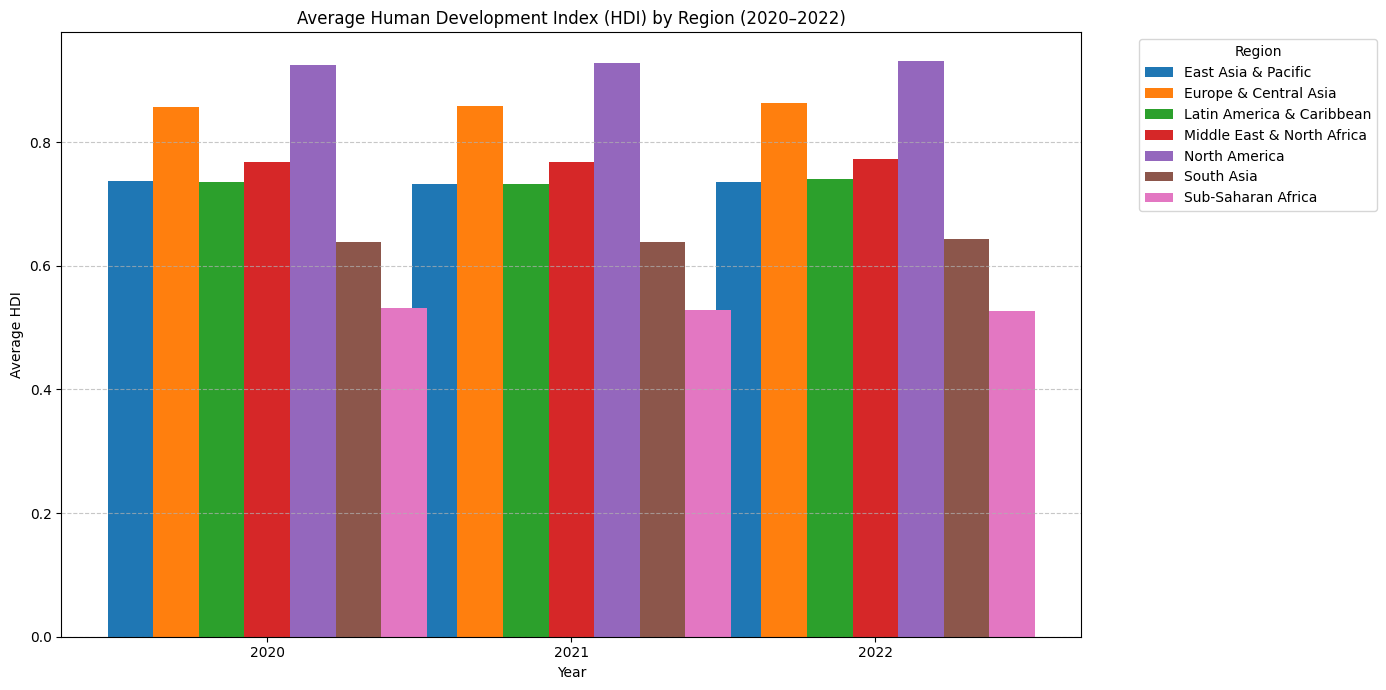

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for grouped bar chart
years = [2020, 2021, 2022]
regions = avg_hdi_region["region"].unique()
bar_width = 0.15  # width of each bar
x = np.arange(len(years))  # the label locations

# Create figure
plt.figure(figsize=(14, 7))

# Plot bars for each region
for i, region in enumerate(regions):
    # Get HDI values for this region for each year
    hdi_values = []
    for year in years:
        value = avg_hdi_region[(avg_hdi_region["region"] == region) & (avg_hdi_region["year"] == year)]["hdi"].values
        hdi_values.append(value[0] if len(value) > 0 else 0)
    plt.bar(x + i * bar_width, hdi_values, width=bar_width, label=region)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Average HDI")
plt.title("Average Human Development Index (HDI) by Region (2020–2022)")
plt.xticks(x + bar_width * (len(regions)-1)/2, years)  # center x-ticks
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

Box Plot: HDI Distribution for 2020, 2021, and 2022
∗ Filter the dataset for the years 2020, 2021, and 2022.
∗ Create a box plot showing HDI spread for each of the three years.
∗ Include titles and axis labels.
∗ Comment briefly on distribution differences.

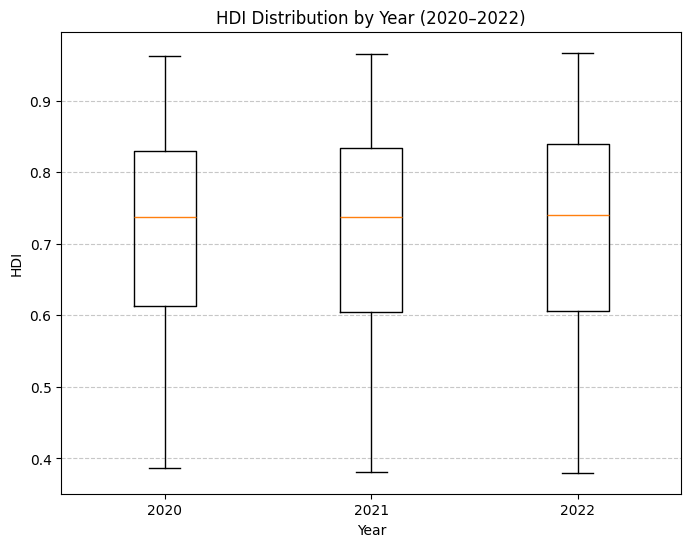

In [17]:
import matplotlib.pyplot as plt

# Filter dataset for years 2020, 2021, 2022
hdi_years_df = hdi_2020_2022_df_clean[hdi_2020_2022_df_clean["year"].isin([2020, 2021, 2022])]

# Prepare data for boxplot
data_2020 = hdi_years_df[hdi_years_df["year"] == 2020]["hdi"]
data_2021 = hdi_years_df[hdi_years_df["year"] == 2021]["hdi"]
data_2022 = hdi_years_df[hdi_years_df["year"] == 2022]["hdi"]

plt.figure(figsize=(8,6))

# Create boxplot using tick_labels instead of labels
plt.boxplot([data_2020, data_2021, data_2022], tick_labels=[2020, 2021, 2022])

# Titles and labels
plt.title("HDI Distribution by Year (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


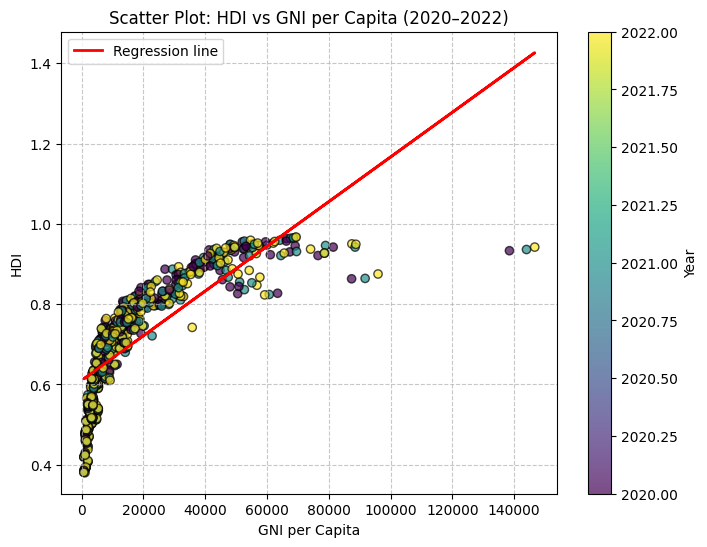

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Check if GNI per Capita column exists
if "gross_inc_percap" not in hdi_2020_2022_df_clean.columns:
    print("GNI per Capita variable not available in the dataset.")
else:
    # Use only years 2020-2022
    scatter_df = hdi_2020_2022_df_clean[hdi_2020_2022_df_clean["year"].isin([2020, 2021, 2022])]

    plt.figure(figsize=(8,6))

    # Scatter plot
    plt.scatter(
        scatter_df["gross_inc_percap"],
        scatter_df["hdi"],
        alpha=0.7,
        c=scatter_df["year"],  # color by year
        cmap="viridis",
        edgecolor='k'
    )

    # Optional: add regression line
    x = scatter_df["gross_inc_percap"]
    y = scatter_df["hdi"]
    if len(x) > 1:
        coeffs = np.polyfit(x, y, 1)  # linear regression
        y_fit = np.polyval(coeffs, x)
        plt.plot(x, y_fit, color='red', linewidth=2, label="Regression line")

    plt.title("Scatter Plot: HDI vs GNI per Capita (2020–2022)")
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.colorbar(label="Year")  # shows which color corresponds to which year
    plt.legend()
    plt.show()


1) Which countries show the greatest improvement in HDI from 2020 to 2022?

In [19]:
# Pivot data to get HDI for each year
hdi_change = (
    hdi_2020_2022_df_clean
    .pivot(index="country", columns="year", values="hdi")
)

# Calculate HDI change from 2020 to 2022
hdi_change["HDI_change_2020_2022"] = hdi_change[2022] - hdi_change[2020]

# Sort by improvement
hdi_improvement = hdi_change.sort_values(
    by="HDI_change_2020_2022", ascending=False
)

# Top 5 improvements
hdi_improvement.head()

# Countries at the top of this table show the greatest improvement in HDI between 2020 and 2022.

year,2020,2021,2022,HDI_change_2020_2022
country,,,,
Andorra,0.843,0.855,0.884,0.041
Azerbaijan,0.722,0.738,0.760,0.038
Ecuador,0.734,0.746,0.765,0.031
Maldives,0.737,0.753,0.762,0.025
Mexico,0.757,0.757,0.781,0.024


2) Did any countries experience a decline in HDI? Provide possible reasons.

In [41]:
# Countries with decline
hdi_decline = hdi_improvement[hdi_improvement["HDI_change_2020_2022"] < 0]

hdi_decline

# Countries with negative HDI change experienced a decline, possibly due to economic contraction, healthcare system strain, conflict, or pandemic-related disruptions.

year,2020,2021,2022,HDI_change_2020_2022
country,,,,
Serbia,0.806,0.804,0.805,-0.001
Romania,0.828,0.825,0.827,-0.001
Lithuania,0.880,0.875,0.879,-0.001
Kiribati,0.629,0.627,0.628,-0.001
Jamaica,0.707,0.704,0.706,-0.001
Egypt,0.729,0.726,0.728,-0.001
Trinidad And Tobago,0.815,0.804,0.814,-0.001
North Macedonia,0.766,0.764,0.765,-0.001
Moldova (Republic Of),0.765,0.767,0.763,-0.002


3) Which region has the highest and lowest average HDI across these three years?

In [ ]:
region_avg_hdi = (
    hdi_2020_2022_df_clean
    .groupby("region")["hdi"]
    .mean()
    .sort_values(ascending=False)
)

region_avg_hdi

'''
The region with the highest average HDI demonstrates stronger overall human
development, while the lowest-ranked region reflects ongoing
development challenges.

'''

4. How did global events (COVID-19) affect HDI trends?



In [ ]:
year_avg_hdi = (
    hdi_2020_2022_df_clean
    .groupby("year")["hdi"]
    .mean()
)

year_avg_hdi

'''
The COVID-19 pandemic negatively impacted HDI through reduced
income levels, disrupted education, and pressure on healthcare
systems. Many countries show stagnation or decline in 2020,
followed by gradual recovery in 2022.

'''

4 Problem 2
Advanced HDI Exploration
Objective:

Perform advanced analysis of HDI data, focusing on South Asian countries, composite metrics, outlier detec-
tion, metric relationships, and gap analysis.

Tasks:
Complete all the following tasks:
1. Create South Asia Subset:
• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
• Filter the HDI dataset to include only these countries.
• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [20]:
# Define South Asian countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the cleaned HDI dataset for only South Asian countries
hdi_south_asia_df = hdi_2020_2022_df_clean[
    hdi_2020_2022_df_clean["country"].isin(south_asia_countries)
].copy()

# Check first few rows to verify
hdi_south_asia_df.head()

# Confirm all countries are included
print(hdi_south_asia_df["country"].unique())

# Save South Asia HDI dataset
hdi_south_asia_df.to_csv(
    "/content/drive/MyDrive/HDI_SouthAsia.csv",
    index=False
)


['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Maldives' 'Nepal' 'Pakistan'
 'Sri Lanka']


2. Composite Development Score:
• Create a new metric called Composite Score using the formula:

Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross_inc_percap"
• Rank South Asian countries based on Composite Score.
• Plot the top 5 countries in a horizontal bar chart.
• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.

Life Expectancy range: 61.982 - 80.839
GNI per Capita range: 1335.205733 - 18846.79219
Composite Score Ranking:
       country  Composite_Score
0     Maldives         0.541439
1    Sri Lanka         0.421424
2       Bhutan         0.310332
3   Bangladesh         0.253315
4        India         0.190708
5        Nepal         0.161877
6     Pakistan         0.133517
7  Afghanistan         0.012759


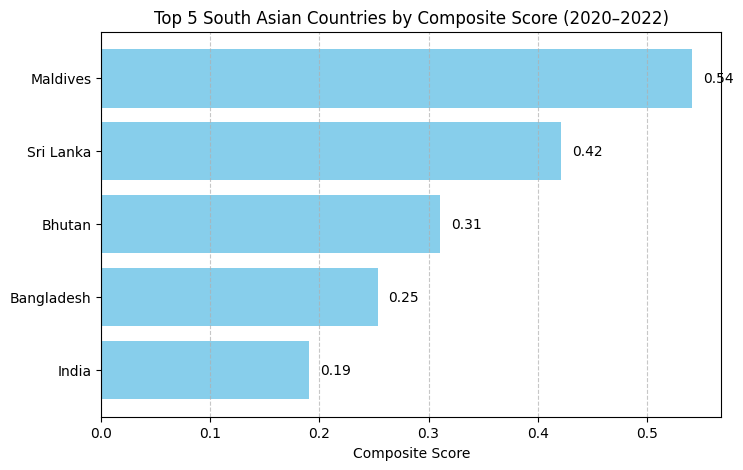


Comparison of Composite Score vs HDI Ranking:
       country  Composite_Score_composite   HDI_hdi  rank_composite  rank_hdi  \
0     Maldives                   0.541439  0.750667             1.0       2.0   
1    Sri Lanka                   0.421424  0.780000             2.0       1.0   
2       Bhutan                   0.310332  0.677667             3.0       3.0   
3   Bangladesh                   0.253315  0.663000             4.0       4.0   
4        India                   0.190708  0.638333             5.0       5.0   
5        Nepal                   0.161877  0.595000             6.0       6.0   
6     Pakistan                   0.133517  0.537667             7.0       7.0   
7  Afghanistan                   0.012759  0.474333             8.0       8.0   

   diff_rank  
0       -1.0  
1        1.0  
2        0.0  
3        0.0  
4        0.0  
5        0.0  
6        0.0  
7        0.0  


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Normalize Life Expectancy and GNI per Capita if needed
# Check ranges
print("Life Expectancy range:", hdi_south_asia_df["life_expectancy"].min(), "-", hdi_south_asia_df["life_expectancy"].max())
print("GNI per Capita range:", hdi_south_asia_df["gross_inc_percap"].min(), "-", hdi_south_asia_df["gross_inc_percap"].max())

# If values are raw, normalize between 0 and 1
LE_min, LE_max = hdi_south_asia_df["life_expectancy"].min(), hdi_south_asia_df["life_expectancy"].max()
GNI_min, GNI_max = hdi_south_asia_df["gross_inc_percap"].min(), hdi_south_asia_df["gross_inc_percap"].max()

hdi_south_asia_df["LE_index"] = (hdi_south_asia_df["life_expectancy"] - LE_min) / (LE_max - LE_min)
hdi_south_asia_df["GNI_index"] = (hdi_south_asia_df["gross_inc_percap"] - GNI_min) / (GNI_max - GNI_min)

# Compute Composite Score
hdi_south_asia_df["Composite_Score"] = 0.3 * hdi_south_asia_df["LE_index"] + 0.3 * hdi_south_asia_df["GNI_index"]

# Average Composite Score per country
composite_ranking = (
    hdi_south_asia_df
    .groupby("country")["Composite_Score"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print("Composite Score Ranking:")
print(composite_ranking)

# Top 5 countries bar chart
top5_composite = composite_ranking.head(5)

plt.figure(figsize=(8,5))
plt.barh(
    top5_composite["country"][::-1],  # reverse for highest on top
    top5_composite["Composite_Score"][::-1],
    color="skyblue"
)
plt.xlabel("Composite Score")
plt.title("Top 5 South Asian Countries by Composite Score (2020–2022)")

# Add value labels
for i, v in enumerate(top5_composite["Composite_Score"][::-1]):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Compare with HDI ranking
hdi_ranking = (
    hdi_south_asia_df
    .groupby("country")["hdi"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Merge rankings
ranking_comparison = composite_ranking.merge(
    hdi_ranking,
    on="country"
)

# Rename columns for clarity
ranking_comparison.rename(
    columns={
        "Composite_Score": "Composite_Score_composite",
        "hdi": "HDI_hdi"
    },
    inplace=True
)

# Compute rank differences
ranking_comparison["rank_composite"] = ranking_comparison["Composite_Score_composite"].rank(ascending=False)
ranking_comparison["rank_hdi"] = ranking_comparison["HDI_hdi"].rank(ascending=False)
ranking_comparison["diff_rank"] = ranking_comparison["rank_composite"] - ranking_comparison["rank_hdi"]

print("\nComparison of Composite Score vs HDI Ranking:")
print(ranking_comparison[["country", "Composite_Score_composite", "HDI_hdi", "rank_composite", "rank_hdi", "diff_rank"]])



Composite Score and HDI rankings are similar for top countries like Maldives and Sri Lanka. Differences occur because Composite Score uses only income and life expectancy, while HDI also includes education. Some countries rank higher in Composite Score due to strong income despite lower education.
Others rank higher in HDI because of better education outcomes. This shows HDI is more comprehensive than the Composite Score.

3. Outlier Detection:

• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.

• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.

• Discuss why the identified countries stand out as outliers.

In [22]:
# Calculate IQR for HDI
Q1_hdi = hdi_south_asia_df["hdi"].quantile(0.25)
Q3_hdi = hdi_south_asia_df["hdi"].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

lower_hdi = Q1_hdi - 1.5 * IQR_hdi
upper_hdi = Q3_hdi + 1.5 * IQR_hdi

# Calculate IQR for GNI per Capita
Q1_gni = hdi_south_asia_df["gross_inc_percap"].quantile(0.25)
Q3_gni = hdi_south_asia_df["gross_inc_percap"].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

lower_gni = Q1_gni - 1.5 * IQR_gni
upper_gni = Q3_gni + 1.5 * IQR_gni

# Identify outliers
hdi_south_asia_df["outlier"] = (
    (hdi_south_asia_df["hdi"] < lower_hdi) |
    (hdi_south_asia_df["hdi"] > upper_hdi) |
    (hdi_south_asia_df["gross_inc_percap"] < lower_gni) |
    (hdi_south_asia_df["gross_inc_percap"] > upper_gni)
)

hdi_south_asia_df[["country","hdi", "gross_inc_percap", "outlier"]]

,country,hdi,gross_inc_percap,outlier
30,Afghanistan,0.488,1986.803772,False
31,Afghanistan,0.473,1534.135377,False
32,Afghanistan,0.462,1335.205733,False
459,Bangladesh,0.657,5822.800881,False
460,Bangladesh,0.662,6220.542581,False
461,Bangladesh,0.670,6511.122178,False
657,Bhutan,0.675,9896.599579,False
658,Bhutan,0.677,10240.746710,False
659,Bhutan,0.681,10624.873880,False
2571,India,0.638,6089.656533,False


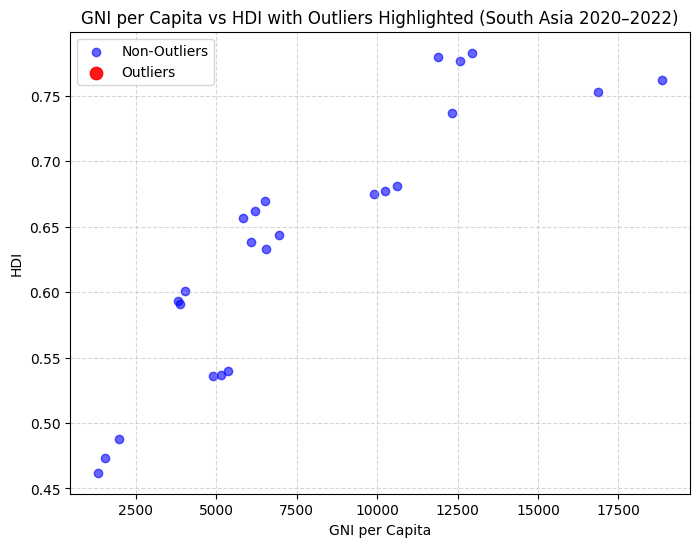

In [23]:
import matplotlib.pyplot as plt

# Separate outliers and non-outliers
outliers = hdi_south_asia_df[hdi_south_asia_df["outlier"]]
non_outliers = hdi_south_asia_df[~hdi_south_asia_df["outlier"]]

plt.figure(figsize=(8,6))

# Plot non-outliers
plt.scatter(
    non_outliers["gross_inc_percap"],
    non_outliers["hdi"],
    color="blue", alpha=0.6, label="Non-Outliers"
)

# Plot outliers
plt.scatter(
    outliers["gross_inc_percap"],
    outliers["hdi"],
    color="red", alpha=0.9, label="Outliers", s=80
)

# Label axes and title
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("GNI per Capita vs HDI with Outliers Highlighted (South Asia 2020–2022)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

# Annotate outlier countries
for _, row in outliers.iterrows():
    plt.text(row["gross_inc_percap"]*1.01, row["hdi"], row["country"], fontsize=9)

plt.show()


The outlier countries stand out because their income and HDI levels are mismatched. Some have high GNI but lower HDI, showing that wealth is not fully improving health or education. Others have low GNI but relatively higher HDI, indicating efficient social development. These differences show that economic growth alone does not determine human development.

4. Exploring Metric Relationships:

• Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).

• Compute Pearson correlation of each metric with HDI.

• Create scatter plots with trendlines to visualize the relationships.

• Discuss:

– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

In [24]:
# Correlation between HDI and Gender Development Index
corr_gender = hdi_south_asia_df["hdi"].corr(
    hdi_south_asia_df["gender_development"]
)

# Correlation between HDI and Life Expectancy Index
corr_life = hdi_south_asia_df["hdi"].corr(
    hdi_south_asia_df["life_expectancy"]
)

print("Correlation between HDI and Gender Development Index:", corr_gender)
print("Correlation between HDI and Life Expectancy Index:", corr_life)


Correlation between HDI and Gender Development Index: 0.8742177004831327
Correlation between HDI and Life Expectancy Index: 0.9387641385416623


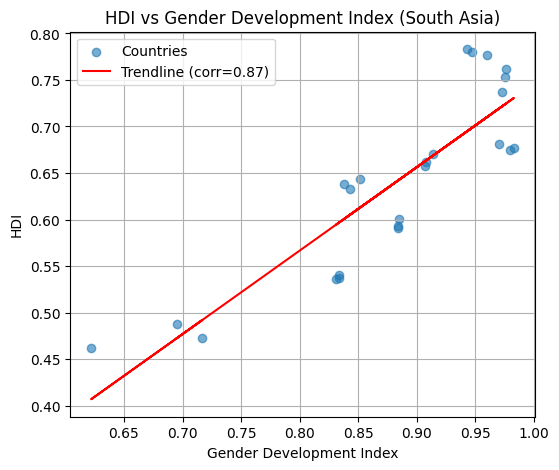

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# HDI vs Gender Development Index
x = hdi_south_asia_df["gender_development"]
y = hdi_south_asia_df["hdi"]
m, b = np.polyfit(x, y, 1)

plt.figure(figsize=(6,5))
plt.scatter(x, y, alpha=0.6, label="Countries")
plt.plot(x, m*x + b, color="red", label=f"Trendline (corr={corr_gender:.2f})")
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("HDI vs Gender Development Index (South Asia)")
plt.legend()
plt.grid(True)
plt.show()


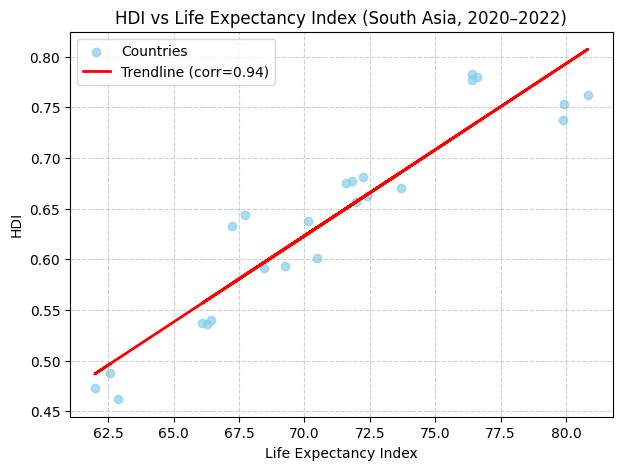

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Select variables
x = hdi_south_asia_df["life_expectancy"]
y = hdi_south_asia_df["hdi"]

# Compute Pearson correlation
corr_life = x.corr(y)

# Fit trendline
m, b = np.polyfit(x, y, 1)

# Create plot
plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.7, color="skyblue", label="Countries")
plt.plot(x, m*x + b, color="red", linewidth=2, label=f"Trendline (corr={corr_life:.2f})")

# Labels and title
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("HDI vs Life Expectancy Index (South Asia, 2020–2022)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()


Life Expectancy Index shows the strongest relationship with HDI, as higher life expectancy directly reflects better health and living conditions.
Gender Development Index shows the weakest relationship with HDI, because gender equality varies independently and does not always increase at the same pace as overall human development.

5. Gap Analysis:

• Create a new metric:

GNI HDI Gap = "gross_inc_percap" − "hdi"

• Rank South Asian countries by GNI HDI Gap in descending and ascending order.

• Plot the top 3 positive gaps and top 3 negative gaps.

• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

In [27]:
# Create GNI_HDI_Gap
hdi_south_asia_df["GNI_HDI_Gap"] = (
    hdi_south_asia_df["gross_inc_percap"] - hdi_south_asia_df["hdi"]
)

gap_ranking = (
    hdi_south_asia_df
    .groupby("country")["GNI_HDI_Gap"]
    .mean()
    .reset_index()
)

top_positive_gaps = gap_ranking.sort_values(
    by="GNI_HDI_Gap",
    ascending=False
)

print(top_positive_gaps.head(3))

top_negative_gaps = gap_ranking.sort_values(
    by="GNI_HDI_Gap",
    ascending=True
)

print(top_negative_gaps.head(3))

gap_plot_df = pd.concat([top_positive_gaps.head(3), top_negative_gaps.head(3)])


     country   GNI_HDI_Gap
4   Maldives  16011.230657
7  Sri Lanka  12481.929060
2     Bhutan  10253.395723
       country  GNI_HDI_Gap
0  Afghanistan  1618.240627
5        Nepal  3901.138692
6     Pakistan  5149.963106


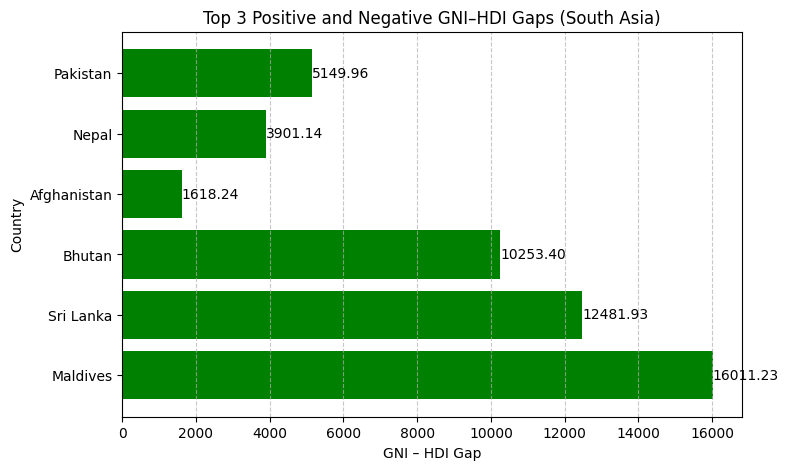

Analysis:
Positive Gaps (Green Bars): These countries have higher GNI per Capita relative to their HDI, indicating that income is relatively high but other development factors (like life expectancy or education) are limiting overall human development.
Negative Gaps (Red Bars): These countries have lower GNI per Capita relative to their HDI, meaning their HDI is relatively strong compared to income, possibly due to good health or education outcomes despite lower income.


In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute GNI-HDI Gap
hdi_south_asia_df["GNI_HDI_Gap"] = hdi_south_asia_df["gross_inc_percap"] - hdi_south_asia_df["hdi"]

# Average gap per country
gap_ranking = hdi_south_asia_df.groupby("country")["GNI_HDI_Gap"].mean().reset_index()

# Top 3 positive gaps
top_positive_gaps = gap_ranking.sort_values(by="GNI_HDI_Gap", ascending=False).head(3)

# Top 3 negative gaps
top_negative_gaps = gap_ranking.sort_values(by="GNI_HDI_Gap", ascending=True).head(3)

# Combine for plotting
gap_plot_df = pd.concat([top_positive_gaps, top_negative_gaps])

# Color: positive = green, negative = red
colors = ["green" if val > 0 else "red" for val in gap_plot_df["GNI_HDI_Gap"]]

# Plot
plt.figure(figsize=(8,5))
plt.barh(gap_plot_df["country"], gap_plot_df["GNI_HDI_Gap"], color=colors)

# Add value labels
for i, v in enumerate(gap_plot_df["GNI_HDI_Gap"]):
    plt.text(v + (0.01 if v > 0 else -0.05), i, f"{v:.2f}", va='center', color='black')

plt.xlabel("GNI – HDI Gap")
plt.ylabel("Country")
plt.title("Top 3 Positive and Negative GNI–HDI Gaps (South Asia)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

print("Analysis:")
print("Positive Gaps (Green Bars): These countries have higher GNI per Capita relative to their HDI, indicating that income is relatively high but other development factors (like life expectancy or education) are limiting overall human development.")
print("Negative Gaps (Red Bars): These countries have lower GNI per Capita relative to their HDI, meaning their HDI is relatively strong compared to income, possibly due to good health or education outcomes despite lower income.")


A high GNI–HDI gap means that a country earns relatively high income but does not convert it effectively into human development outcomes. This may be due to income inequality, weak public services, poor education and health systems, or uneven distribution of wealth. Conversely, countries with low or negative gaps often use limited income more efficiently to improve living standards, indicating better social policies and inclusive development.

5 Problem 3

Comparative Regional Analysis: South Asia vs Middle East

Objective:

Perform a comparative analysis of HDI and related metrics between South Asia and the Middle East using
the 2020–2022 dataset from Problem 1B.
Tasks:
Complete all the following tasks:
1. Create Middle East Subset:
• Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].
• Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.
• Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.

In [29]:
import pandas as pd

# Define country lists
# South Asia countries
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Middle East countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter dataset for South Asia
hdi_south_asia_2020_2022 = hdi_2020_2022_df_clean[
    hdi_2020_2022_df_clean["country"].isin(south_asia_countries)
].copy()

# Filter dataset for Middle East
hdi_middle_east_2020_2022 = hdi_2020_2022_df_clean[
    hdi_2020_2022_df_clean["country"].isin(middle_east_countries)
].copy()

# Verify the filtered countries
print("South Asia countries in subset:", hdi_south_asia_2020_2022["country"].unique())
print("Middle East countries in subset:", hdi_middle_east_2020_2022["country"].unique())

# Save South Asia subset
hdi_south_asia_2020_2022.to_csv(
    "/content/drive/MyDrive/HDI_SouthAsia_2020_2022.csv",
    index=False
)

# Save Middle East subset
hdi_middle_east_2020_2022.to_csv(
    "/content/drive/MyDrive/HDI_MiddleEast_2020_2022.csv",
    index=False
)


South Asia countries in subset: ['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Maldives' 'Nepal' 'Pakistan'
 'Sri Lanka']
Middle East countries in subset: ['Bahrain' 'Iraq' 'Israel' 'Jordan' 'Kuwait' 'Lebanon' 'Oman' 'Qatar'
 'Saudi Arabia' 'United Arab Emirates' 'Yemen']


2. Descriptive Statistics:
• Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.
• Identify which region performs better on average.

In [30]:

# Compute descriptive statistics for South Asia

# Calculate mean and standard deviation of HDI
south_asia_stats = hdi_south_asia_2020_2022["hdi"].agg(["mean", "std"])
print("South Asia HDI Statistics (2020–2022):")
print(south_asia_stats)


# Compute descriptive statistics for Middle East

middle_east_stats = hdi_middle_east_2020_2022["hdi"].agg(["mean", "std"])
print("\nMiddle East HDI Statistics (2020–2022):")
print(middle_east_stats)


# Compare average HDI between regions

print("\nAverage HDI Comparison:")
print("South Asia Mean HDI:", south_asia_stats["mean"])
print("Middle East Mean HDI:", middle_east_stats["mean"])


# Identify which region performs better

if south_asia_stats["mean"] > middle_east_stats["mean"]:
    print("\nConclusion: South Asia has a higher average HDI across 2020–2022.")
else:
    print("\nConclusion: Middle East has a higher average HDI across 2020–2022.")



South Asia HDI Statistics (2020–2022):
mean    0.639583
std     0.098273
Name: hdi, dtype: float64

Middle East HDI Statistics (2020–2022):
mean    0.788909
std     0.141295
Name: hdi, dtype: float64

Average HDI Comparison:
South Asia Mean HDI: 0.6395833333333333
Middle East Mean HDI: 0.7889090909090909

Conclusion: Middle East has a higher average HDI across 2020–2022.


Identify which region performs better on average.
Ans:
On average, the Middle East performs better than South Asia in terms of HDI across 2020–2022, as it shows a higher mean HDI value over these years.

3. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on HDI.
• Create a bar chart comparing these top and bottom performers across the two regions.

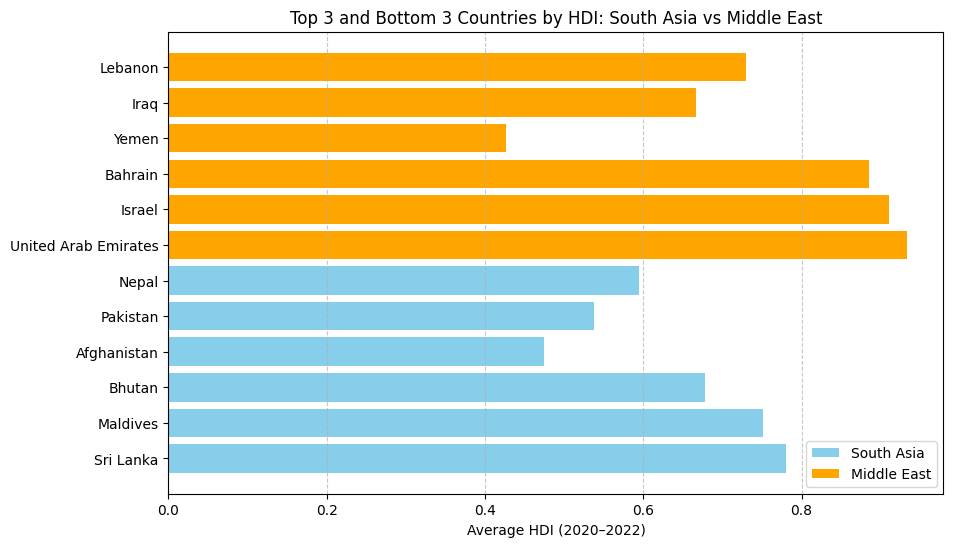

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Compute average HDI per country for each region

south_asia_avg = (
    hdi_south_asia_2020_2022
    .groupby("country")["hdi"]
    .mean()
    .reset_index()
)

middle_east_avg = (
    hdi_middle_east_2020_2022
    .groupby("country")["hdi"]
    .mean()
    .reset_index()
)


# Identify Top 3 and Bottom 3 countries based on HDI

top3_south_asia = south_asia_avg.sort_values(by="hdi", ascending=False).head(3)
bottom3_south_asia = south_asia_avg.sort_values(by="hdi", ascending=True).head(3)

top3_middle_east = middle_east_avg.sort_values(by="hdi", ascending=False).head(3)
bottom3_middle_east = middle_east_avg.sort_values(by="hdi", ascending=True).head(3)


# Add region labels

top3_south_asia["Region"] = "South Asia"
bottom3_south_asia["Region"] = "South Asia"
top3_middle_east["Region"] = "Middle East"
bottom3_middle_east["Region"] = "Middle East"


# Combine top and bottom performers into one DataFrame

top_bottom_df = pd.concat([
    top3_south_asia, bottom3_south_asia,
    top3_middle_east, bottom3_middle_east
])


#  Plot a horizontal bar chart

plt.figure(figsize=(10,6))

# Assign colors by region
colors = top_bottom_df["Region"].map({"South Asia":"skyblue", "Middle East":"orange"})

plt.barh(top_bottom_df["country"], top_bottom_df["hdi"], color=colors)
plt.xlabel("Average HDI (2020–2022)")
plt.title("Top 3 and Bottom 3 Countries by HDI: South Asia vs Middle East")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="skyblue", label="South Asia"),
    Patch(facecolor="orange", label="Middle East")
]
plt.legend(handles=legend_elements, loc="lower right")

plt.show()


4. Metric Comparisons:
• Compare the following metrics across regions using grouped bar charts:
– Gender Development Index {"gender development"}
– Life Expectancy Index {"life expectancy"}
– GNI per Capita Index {"gross_inc_percap"}
• Identify which metric shows the greatest disparity between regions.

In [32]:
import pandas as pd

# Define metrics to compare
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

# Add Region column to each subset
hdi_south_asia_2020_2022["Region"] = "South Asia"
hdi_middle_east_2020_2022["Region"] = "Middle East"

# Combine South Asia and Middle East datasets
hdi_combined = pd.concat([hdi_south_asia_2020_2022, hdi_middle_east_2020_2022])

# Compute average of each metric per region
region_metrics = hdi_combined.groupby("Region")[metrics].mean().reset_index()
region_metrics


,Region,gender_development,life_expectancy,gross_inc_percap
0,Middle East,0.896545,75.855455,37750.770520
1,South Asia,0.881458,70.970083,7766.509931


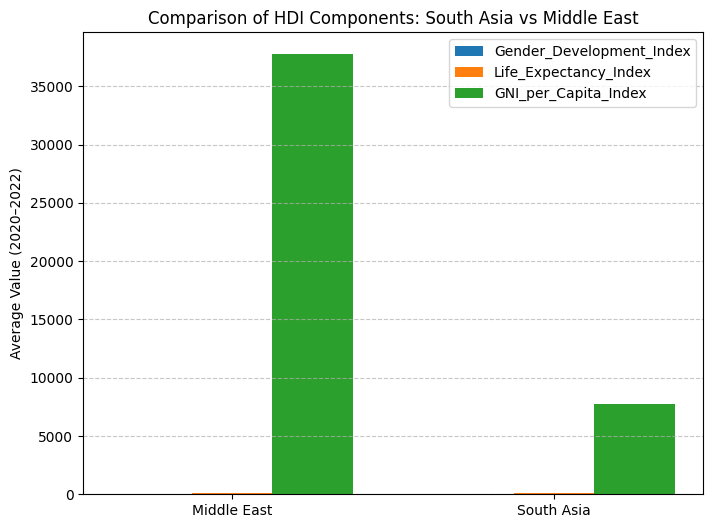

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
labels = region_metrics["Region"]
x = np.arange(len(labels))  # the label locations
width = 0.25  # width of bars

fig, ax = plt.subplots(figsize=(8,6))

# Plot each metric
ax.bar(x - width, region_metrics["gender_development"], width, label="Gender_Development_Index")
ax.bar(x, region_metrics["life_expectancy"], width, label="Life_Expectancy_Index")
ax.bar(x + width, region_metrics["gross_inc_percap"], width, label="GNI_per_Capita_Index")

# Labels and title
ax.set_ylabel("Average Value (2020–2022)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Comparison of HDI Components: South Asia vs Middle East")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


5. HDI Disparity:
• Compute the range (max – min) of HDI for each region.
• Compute the coefficient of variation (CV = std/mean) for HDI.
• Identify which region exhibits more variation in HDI.

In [34]:
# Compute HDI Range (max - min) for each region
# South Asia
sa_max = hdi_south_asia_2020_2022["hdi"].max()
sa_min = hdi_south_asia_2020_2022["hdi"].min()
sa_range = sa_max - sa_min

# Middle East
me_max = hdi_middle_east_2020_2022["hdi"].max()
me_min = hdi_middle_east_2020_2022["hdi"].min()
me_range = me_max - me_min

print("South Asia HDI range:", sa_range)
print("Middle East HDI range:", me_range)


South Asia HDI range: 0.321
Middle East HDI range: 0.5130000000000001


In [35]:
# Compute Coefficient of Variation (CV = std/mean) for HDI
# South Asia
sa_mean = hdi_south_asia_2020_2022["hdi"].mean()
sa_std = hdi_south_asia_2020_2022["hdi"].std()
sa_cv = sa_std / sa_mean

# Middle East
me_mean = hdi_middle_east_2020_2022["hdi"].mean()
me_std = hdi_middle_east_2020_2022["hdi"].std()
me_cv = me_std / me_mean

print("South Asia HDI CV:", sa_cv)
print("Middle East HDI CV:", me_cv)


South Asia HDI CV: 0.1536520924690084
Middle East HDI CV: 0.17910145193048382


6. Correlation Analysis:
• For each region, compute correlations of HDI with:
– Gender Development Index
– Life Expectancy Index
• Create scatter plots with trendlines for each correlation.
• Interpret the strength and direction of these relationships.

In [36]:
# Compute Pearson correlations
# South Asia
sa_corr_gender = hdi_south_asia_2020_2022["hdi"].corr(
    hdi_south_asia_2020_2022["gender_development"]
)
sa_corr_life = hdi_south_asia_2020_2022["hdi"].corr(
    hdi_south_asia_2020_2022["life_expectancy"]
)

print("South Asia - HDI vs Gender Development:", sa_corr_gender)
print("South Asia - HDI vs Life Expectancy:", sa_corr_life)

# Middle East
me_corr_gender = hdi_middle_east_2020_2022["hdi"].corr(
    hdi_middle_east_2020_2022["gender_development"]
)
me_corr_life = hdi_middle_east_2020_2022["hdi"].corr(
    hdi_middle_east_2020_2022["life_expectancy"]
)

print("Middle East - HDI vs Gender Development:", me_corr_gender)
print("Middle East - HDI vs Life Expectancy:", me_corr_life)


South Asia - HDI vs Gender Development: 0.8742177004831327
South Asia - HDI vs Life Expectancy: 0.9387641385416623
Middle East - HDI vs Gender Development: 0.9356697525724119
Middle East - HDI vs Life Expectancy: 0.9331227568940162


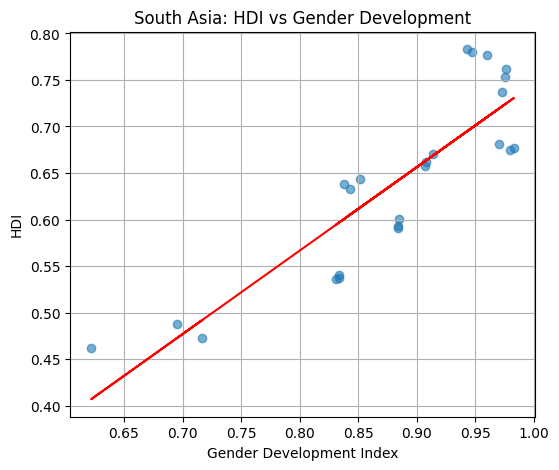

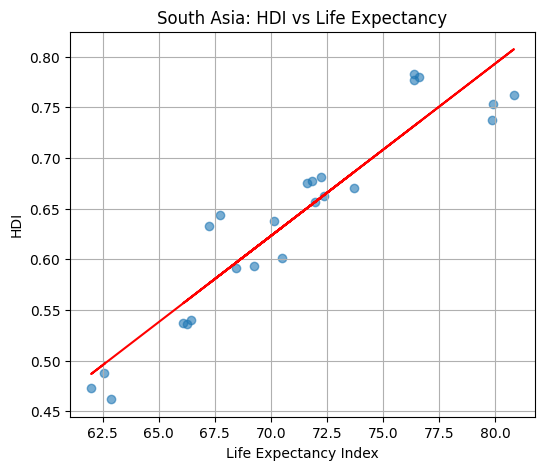

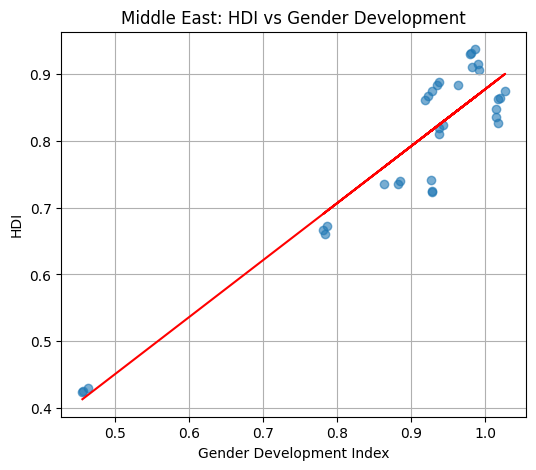

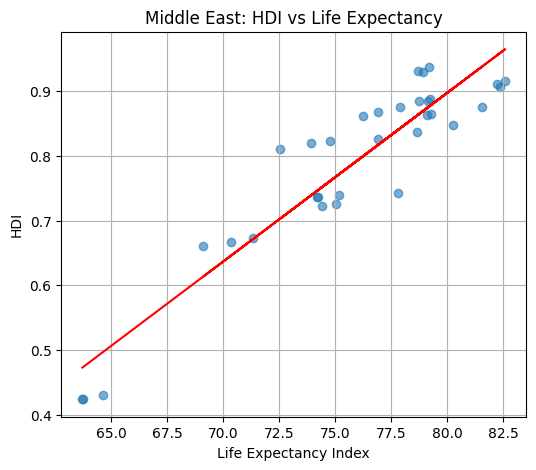

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot scatter with trendline
def scatter_trend(x, y, xlabel, ylabel, title):
    m, b = np.polyfit(x, y, 1)
    plt.figure(figsize=(6,5))
    plt.scatter(x, y, alpha=0.6)
    plt.plot(x, m*x + b, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# South Asia
scatter_trend(
    hdi_south_asia_2020_2022["gender_development"],
    hdi_south_asia_2020_2022["hdi"],
    "Gender Development Index",
    "HDI",
    "South Asia: HDI vs Gender Development"
)

scatter_trend(
    hdi_south_asia_2020_2022["life_expectancy"],
    hdi_south_asia_2020_2022["hdi"],
    "Life Expectancy Index",
    "HDI",
    "South Asia: HDI vs Life Expectancy"
)

# Middle East
scatter_trend(
    hdi_middle_east_2020_2022["gender_development"],
    hdi_middle_east_2020_2022["hdi"],
    "Gender Development Index",
    "HDI",
    "Middle East: HDI vs Gender Development"
)

scatter_trend(
    hdi_middle_east_2020_2022["life_expectancy"],
    hdi_middle_east_2020_2022["hdi"],
    "Life Expectancy Index",
    "HDI",
    "Middle East: HDI vs Life Expectancy"
)


7. Outlier Detection:
• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross_inc_percap"} for each region using
the 1.5 × IQR rule.
• Create scatter plots highlighting outliers in a different color.
• Discuss the significance of these outliers.

In [38]:
# HDI
Q1_hdi_sa = hdi_south_asia_2020_2022["hdi"].quantile(0.25)
Q3_hdi_sa = hdi_south_asia_2020_2022["hdi"].quantile(0.75)
IQR_hdi_sa = Q3_hdi_sa - Q1_hdi_sa
lower_hdi_sa = Q1_hdi_sa - 1.5 * IQR_hdi_sa
upper_hdi_sa = Q3_hdi_sa + 1.5 * IQR_hdi_sa

# GNI per Capita
Q1_gni_sa = hdi_south_asia_2020_2022["gross_inc_percap"].quantile(0.25)
Q3_gni_sa = hdi_south_asia_2020_2022["gross_inc_percap"].quantile(0.75)
IQR_gni_sa = Q3_gni_sa - Q1_gni_sa
lower_gni_sa = Q1_gni_sa - 1.5 * IQR_gni_sa
upper_gni_sa = Q3_gni_sa + 1.5 * IQR_gni_sa

# Flag outliers
hdi_south_asia_2020_2022["outlier"] = (
    (hdi_south_asia_2020_2022["hdi"] < lower_hdi_sa) |
    (hdi_south_asia_2020_2022["hdi"] > upper_hdi_sa) |
    (hdi_south_asia_2020_2022["gross_inc_percap"] < lower_gni_sa) |
    (hdi_south_asia_2020_2022["gross_inc_percap"] > upper_gni_sa)
)


In [39]:
# HDI
Q1_hdi_me = hdi_middle_east_2020_2022["hdi"].quantile(0.25)
Q3_hdi_me = hdi_middle_east_2020_2022["hdi"].quantile(0.75)
IQR_hdi_me = Q3_hdi_me - Q1_hdi_me
lower_hdi_me = Q1_hdi_me - 1.5 * IQR_hdi_me
upper_hdi_me = Q3_hdi_me + 1.5 * IQR_hdi_me

# GNI per Capita
Q1_gni_me = hdi_middle_east_2020_2022["gross_inc_percap"].quantile(0.25)
Q3_gni_me = hdi_middle_east_2020_2022["gross_inc_percap"].quantile(0.75)
IQR_gni_me = Q3_gni_me - Q1_gni_me
lower_gni_me = Q1_gni_me - 1.5 * IQR_gni_me
upper_gni_me = Q3_gni_me + 1.5 * IQR_gni_me

# Flag outliers
hdi_middle_east_2020_2022["outlier"] = (
    (hdi_middle_east_2020_2022["hdi"] < lower_hdi_me) |
    (hdi_middle_east_2020_2022["hdi"] > upper_hdi_me) |
    (hdi_middle_east_2020_2022["gross_inc_percap"] < lower_gni_me) |
    (hdi_middle_east_2020_2022["gross_inc_percap"] > upper_gni_me)
)


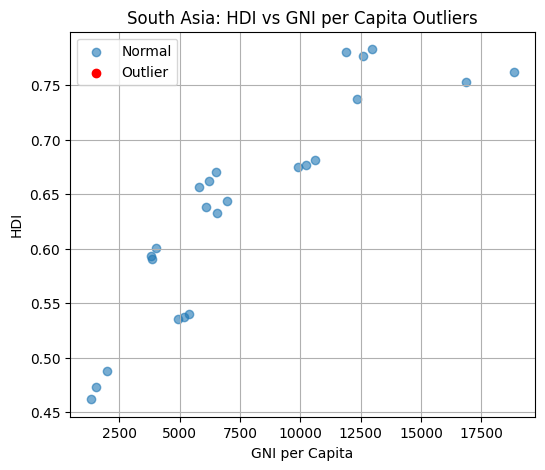

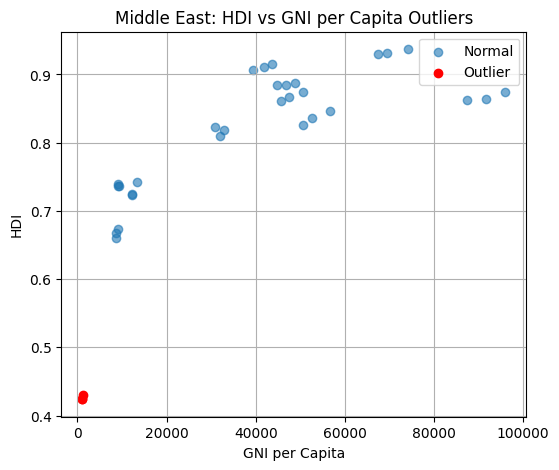

In [40]:
import matplotlib.pyplot as plt

def scatter_outliers(df, region_name):
    plt.figure(figsize=(6,5))
    # Normal points
    plt.scatter(
        df.loc[~df["outlier"], "gross_inc_percap"],
        df.loc[~df["outlier"], "hdi"],
        label="Normal",
        alpha=0.6
    )
    # Outliers
    plt.scatter(
        df.loc[df["outlier"], "gross_inc_percap"],
        df.loc[df["outlier"], "hdi"],
        color="red",
        label="Outlier"
    )
    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title(f"{region_name}: HDI vs GNI per Capita Outliers")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot South Asia
scatter_outliers(hdi_south_asia_2020_2022, "South Asia")

# Plot Middle East
scatter_outliers(hdi_middle_east_2020_2022, "Middle East")


• Discuss the significance of these outliers.

The outliers are significant because they represent countries whose development patterns differ markedly from the regional norm. High outliers often indicate unusually strong income levels or HDI compared to neighboring countries, while low outliers reflect conflict, political instability, or economic crises that severely limit human development. These countries can disproportionately affect regional averages and highlight inequalities within the region.
